In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix


# modal

In [27]:
def linear_regression(X, y, alpha=0.1,num_classes=3, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros((n_features, num_classes))       # column vector
    # y = y.reshape(-1, 1)                # ensure column vector
    loss_history = []

    for _ in range(epochs):
        y_pred = X @ w                  # (n_samples,1)
        error = y_pred - y              # (n_samples,1)
        gradient = (1 / n_samples) * (X.T @ error)  # (n_features,1)
        w -= alpha * gradient           # update
        loss = (1 / (2 * n_samples)) * np.sum(error ** 2)
        loss_history.append(loss)

    return w, loss_history

def linear_regression_multiclass(X, y, alpha=0.1, epochs=1000, num_classes=3):
    n_samples, n_features = X.shape
    w = np.zeros((n_features, num_classes))   # One weight vector for each class
    y_one_hot = np.eye(num_classes)[y]       # Convert y to one-hot encoding (0, 1, 2 -> [1, 0, 0], etc.)
    loss_history = []

    for _ in range(epochs):
        y_pred = X @ w                # Predicted values for each class (n_samples, num_classes)
        error = y_pred - y_one_hot    # Error between predicted and actual labels
        gradient = (1 / n_samples) * (X.T @ error)  # Gradient for each class
        w -= alpha * gradient         # Update weights
        
        # Calculate loss (Mean Squared Error for one-vs-all)
        loss = (1 / (2 * n_samples)) * np.sum(error ** 2)
        loss_history.append(loss)

    return w, loss_history

In [28]:
def predict_softmax(X, w):
    scores = X @ w  # Predicted scores for each class
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Convert scores to probabilities
    return np.argmax(probs, axis=1)

In [29]:
# Prediction
def predict(X, w):
    return X.dot(w)

# Convert regression outputs → class labels
def classify(preds):
    return np.round(preds).astype(int).clip(0, 2)

# Prediction for multiclass classification
def predict_multiclass(X, w):
    y_pred = X @ w   # Predicted scores for each class

    return y_pred
    # return np.argmax(y_pred, axis=1) 

In [30]:
# Evaluation metrics
def evaluate(y_true, y_pred, name="Model"):
    accuracy = np.mean(y_true == y_pred)
    precision_list, recall_list, f1_list = [], [], []

    for c in np.unique(y_true):
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        fn = np.sum((y_pred != c) & (y_true == c))

        precision = tp / (tp + fp + 1e-9)
        recall = tp / (tp + fn + 1e-9)
        f1 = 2 * precision * recall / (precision + recall + 1e-9)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {np.mean(precision_list):.2f}")
    print(f"Recall: {np.mean(recall_list):.2f}")
    print(f"F1 Score: {np.mean(f1_list):.2f}")


In [31]:
def evaluate_model(X, y, w, name="Model"):
    predictions = [sum(w[j] * x[j] for j in range(len(x))) + w[-1] for x in X]
    avg_error = np.mean(np.abs(np.array(predictions) - y))
    print(f"{name} Average Absolute Error: {avg_error:.2f}")

# split

In [32]:
def split(X, y, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Ratios must sum to 1."

    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Ensure NumPy arrays
    X = np.array(X)
    y = np.array(y)

    X = X[indices]
    y = y[indices]

    n_train = int(train_ratio * len(X))
    n_val = int(val_ratio * len(X))

    X_train, y_train = X[:n_train], y[:n_train]
    X_val, y_val = X[n_train:n_train+n_val], y[n_train:n_train+n_val]
    X_test, y_test = X[n_train+n_val:], y[n_train+n_val:]

    return X_train, y_train, X_val, y_val, X_test, y_test


# implementation

In [33]:
df=pd.read_csv("Iris.csv")

In [34]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
(df["Species"]).unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
# Map species to numeric
class_map = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
class_unmap = {0:"setosa",1: "versicolor", 2:"virginica"}
df["Species"] = df["Species"].replace(class_map)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9764\3522891661.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Species"] = df["Species"].replace(class_map)


In [37]:
X=df.drop(columns="Species").drop(columns="Id")
y=df["Species"]

In [38]:
cols=X.columns
cols

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [39]:
def min_max(df):
    return (df-df.min())/(df.max()-df.min())

In [40]:
for c in cols:
    X[c]=min_max(X[c])

In [41]:
num_classes = len(np.unique(y))

In [42]:
def one_hot_encode(labels):
    classes = sorted(set(labels))
    class_to_idx = {c: i for i, c in enumerate(classes)}
    Y = np.zeros((len(labels), len(classes)))
    for i, label in enumerate(labels):
        Y[i, class_to_idx[label]] = 1
    return Y, class_to_idx

In [43]:
def compute_roc_auc(y_true, y_score, thresholds=np.linspace(0,1,101)):
    TPR, FPR = [], []
    for t in thresholds:
        y_hat = (y_score >= t).astype(int)
        TP = np.sum((y_hat==1) & (y_true==1))
        FP = np.sum((y_hat==1) & (y_true==0))
        TN = np.sum((y_hat==0) & (y_true==0))
        FN = np.sum((y_hat==0) & (y_true==1))
        tpr = TP/(TP+FN) if (TP+FN)>0 else 0
        fpr = FP/(FP+TN) if (FP+TN)>0 else 0
        TPR.append(tpr)
        FPR.append(fpr)
    FPR, TPR = zip(*sorted(zip(FPR,TPR)))
    auc = np.trapz(TPR, FPR)
    return np.array(FPR), np.array(TPR), auc

In [44]:
y_onehot = np.eye(num_classes)[y]

In [45]:
(y_onehot)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [46]:
w,_=linear_regression(X.values,y_onehot,0.001)

In [ ]:
y_pred =predict_multiclass(X.values,w)


array([[0.11632007, 0.07430355, 0.09519672],
       [0.07830548, 0.05559292, 0.07221376],
       [0.09023163, 0.05346476, 0.0681474 ],
       [0.08199544, 0.05224149, 0.06700834],
       [0.12229884, 0.07427336, 0.09458586],
       [0.14811112, 0.10827073, 0.14218456],
       [0.10321119, 0.06267818, 0.08091998],
       [0.10805248, 0.0710125 , 0.09121301],
       [0.06536609, 0.03945604, 0.05050698],
       [0.08564523, 0.05581352, 0.07073712],
       [0.13410953, 0.08978351, 0.11541768],
       [0.10576367, 0.06769126, 0.08661845],
       [0.07731486, 0.0483869 , 0.06106411],
       [0.07142014, 0.028711  , 0.03393213],
       [0.16007238, 0.10235116, 0.13108841],
       [0.18722301, 0.1255403 , 0.16319783],
       [0.14798553, 0.09999959, 0.13080597],
       [0.11615059, 0.07881505, 0.10262676],
       [0.14462203, 0.10917843, 0.14280459],
       [0.13759861, 0.0888758 , 0.11479765],
       [0.1127557 , 0.08592611, 0.11178073],
       [0.13029026, 0.09072298, 0.11911895],
       [0.

C:\Users\Admin\AppData\Local\Temp\ipykernel_9764\1425633759.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(TPR, FPR)


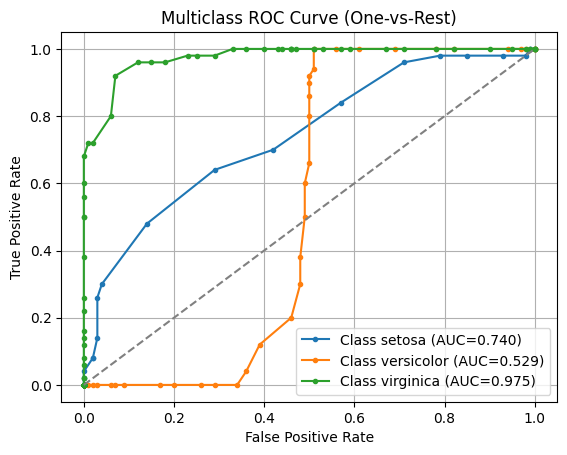

Class setosa AUC: 0.7404
Class versicolor AUC: 0.5290
Class virginica AUC: 0.9747
Macro-average AUC: 0.748


In [61]:

aucs = []
for c in range(0,3):
    FPR, TPR, auc = compute_roc_auc(y_onehot[:,c], y_pred[:,c])
    aucs.append(auc)
    plt.plot(FPR, TPR, marker=".", label=f"Class {class_unmap[c]} (AUC={auc:.3f})")


plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()

for i in range(len(class_unmap.keys())):
    print(f"Class {class_unmap[i]} AUC: {aucs[i]:.4f}")

print("Macro-average AUC:", round(np.mean(aucs),4))

